# Comparing prescribed bottom temperature

In [1]:
import intake
import glob
import dask.distributed as dsk
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr
import numpy as np
import xesmf as xe
import pandas as pd

import cmocean as cm
import cartopy.crs as ccrs

import cartopy.feature as cft
import matplotlib.path as mpath

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [3]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33111,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:33177,Total threads: 1
Dashboard: /proxy/43229/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:40027,


In [4]:
pan_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/midtemp_anom_CT_prescribed_pan01.nc', chunks = 'auto')
acc_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/midtemp_anom_prescribed_access.nc', chunks = 'auto')

In [5]:
pan_anom_new = pan_anom.to_series()
acc_anom_new = acc_anom.to_series()

In [6]:
# Slice 1910–1919 and 2001–2010
pan_anom_new = pan_anom_new['2001-01-01':'2010-12-16']
acc_anom_new = acc_anom_new['1910-01-01':'1919-12-16']

# Reset index to normalized months
pan_anom_new.index = range(1, len(pan_anom_new)+1)
acc_anom_new.index = range(1, len(acc_anom_new)+1)

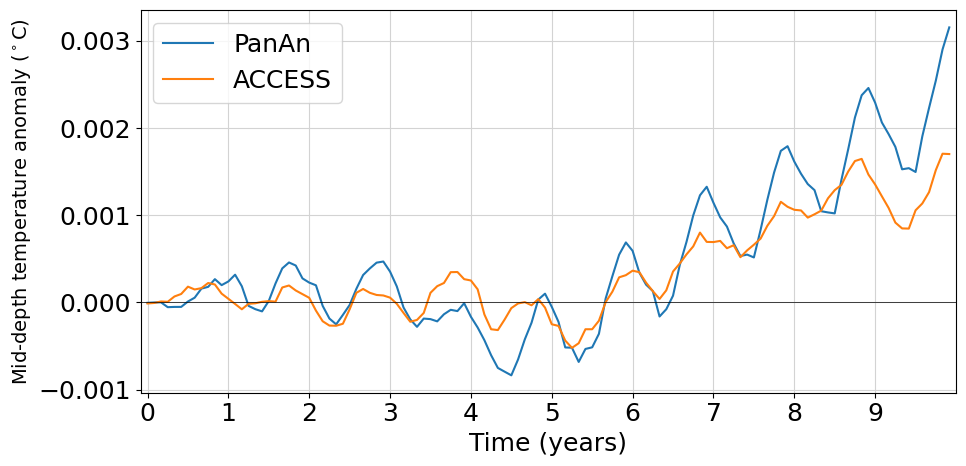

In [13]:
plt.rcParams['font.size'] = 18

plt.figure(figsize=(10, 5))
plt.plot(pan_anom_new.index, pan_anom_new.values, label='PanAn')
plt.plot(acc_anom_new.index, acc_anom_new.values, label='ACCESS')

# Set x-axis ticks to represent years 1 through 10
plt.xticks(ticks=range(1, 121, 12), labels=[str(i) for i in range(0, 10)])

# Labeling and formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Time (years)')
plt.ylabel("Mid-depth temperature anomaly ($^\circ$C)",fontsize=14)
plt.xlim(0,121)
plt.title('')
plt.legend()
plt.grid(True, color='lightgrey')
plt.tight_layout()
plt.show()

# Check against adaptive experiment

In [8]:
pan_anom_adapt = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/midtemp_anom_CT_pan01.nc', chunks = 'auto')

In [9]:
pan_anom_adapt_new = pan_anom_adapt.to_series()

In [10]:
pan_anom_adapt_new = pan_anom_adapt_new['2001-01-01':'2010-12-16']
pan_anom_adapt_new.index = range(1, len(pan_anom_adapt_new)+1)

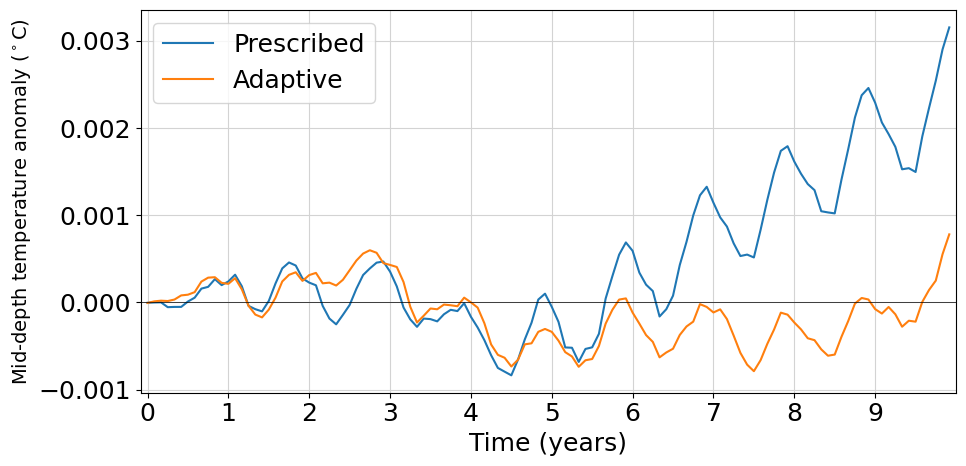

In [14]:
plt.rcParams['font.size'] = 18

plt.figure(figsize=(10, 5))
plt.plot(pan_anom_new.index, pan_anom_new.values, label='Prescribed')
plt.plot(pan_anom_adapt_new.index, pan_anom_adapt_new.values, label='Adaptive')

# Set x-axis ticks to represent years 1 through 10
plt.xticks(ticks=range(1, 121, 12), labels=[str(i) for i in range(0, 10)])

# Labeling and formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Time (years)')
plt.ylabel("Mid-depth temperature anomaly ($^\circ$C)",fontsize=14)
plt.title('')
plt.legend()
plt.xlim(0,121)
plt.grid(True, color='lightgrey')
plt.tight_layout()
plt.show()